<a href="https://colab.research.google.com/github/DorcasMutsa/EmployeeRetentionAnalysis/blob/main/EmployeeRetentionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/HR_comma_sep 1.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
#checking missing values
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
#number of those who left.
df['left'].value_counts()

,count
left,
0,11428
1,3571


In [ ]:
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [ ]:
#converting categorical columns to numeric codes
df['Department'] = df['Department'].astype('category').cat.codes
df['salary'] = df['salary'].astype('category').cat.codes

In [23]:
# Convert to categorical and keep both versions
df['Department_cat'] = df['Department'].astype('category')
df['Department_code'] = df['Department_cat'].cat.codes
df['salary_cat'] = df['salary'].astype('category')
df['salary_code'] = df['salary_cat'].cat.codes
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_cat,Department_code,salary_cat,salary_code
0,0.38,0.53,2,157,3,0,1,0,7,1,7,7,1,1
1,0.80,0.86,5,262,6,0,1,0,7,2,7,7,2,2
2,0.11,0.88,7,272,4,0,1,0,7,2,7,7,2,2
3,0.72,0.87,5,223,5,0,1,0,7,1,7,7,1,1
4,0.37,0.52,2,159,3,0,1,0,7,1,7,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1,8,8,1,1
14995,0.37,0.48,2,160,3,0,1,0,8,1,8,8,1,1
14996,0.37,0.53,2,143,3,0,1,0,8,1,8,8,1,1
14997,0.11,0.96,6,280,4,0,1,0,8,1,8,8,1,1


In [24]:
#correlation matrix to see which variables are strongly related to retention
correlation_matrix = df.corr()
correlation_matrix['left'].sort_values(ascending=False)

,left
left,1.000000
time_spend_company,0.144822
average_montly_hours,0.071287
Department_cat,0.032105
Department,0.032105
Department_code,0.032105
number_project,0.023787
last_evaluation,0.006567
salary_cat,-0.001294
salary,-0.001294


In [25]:
#retention rate where 'left' = 1 if employee left
df.groupby('left').mean(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Department_code,salary_code
left,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842,6.035284,1.345842


In [19]:
#Salary impact on retention
salary_retention = df.groupby('salary')['left'].value_counts(normalize=True).unstack()
salary_retention

left,0,1
salary,,
0,0.933711,0.066289
1,0.703116,0.296884
2,0.795687,0.204313


/tmp/ipython-input-3229220898.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_impact = df.groupby(['salary_cat', 'left']).size().unstack()


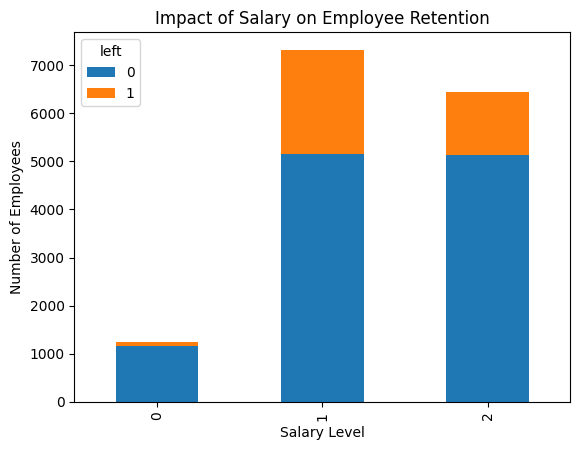

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by salary and retention
salary_impact = df.groupby(['salary_cat', 'left']).size().unstack()
salary_impact.plot(kind='bar', stacked=True)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()

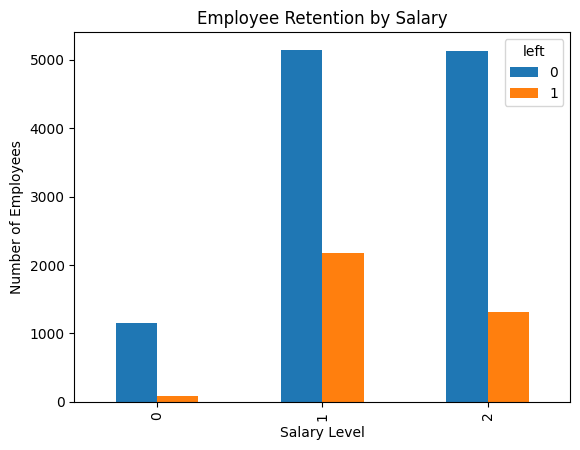

In [33]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

plt.title("Employee Retention by Salary")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.show()


In [ ]:
#Department impact on retention
department_retention = df.groupby('Department')['left'].value_counts(normalize=True).unstack()
department_retention

left,0,1
Department,,
0,0.777506,0.222494
1,0.846252,0.153748
2,0.734029,0.265971
3,0.709066,0.290934
4,0.855556,0.144444
5,0.763403,0.236597
6,0.780488,0.219512
7,0.755072,0.244928
8,0.751009,0.248991


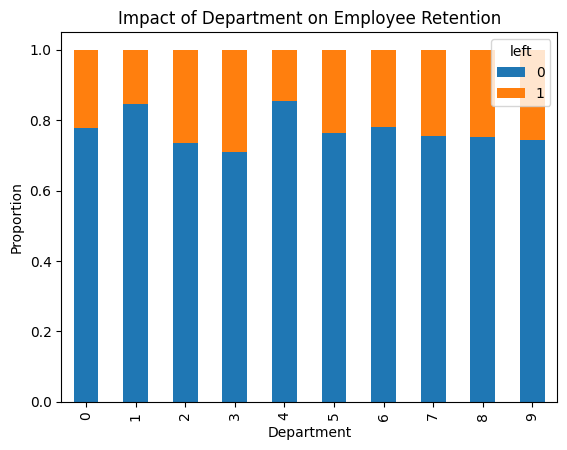

In [ ]:
department_retention.plot(kind='bar', stacked=True)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Proportion')
plt.show()

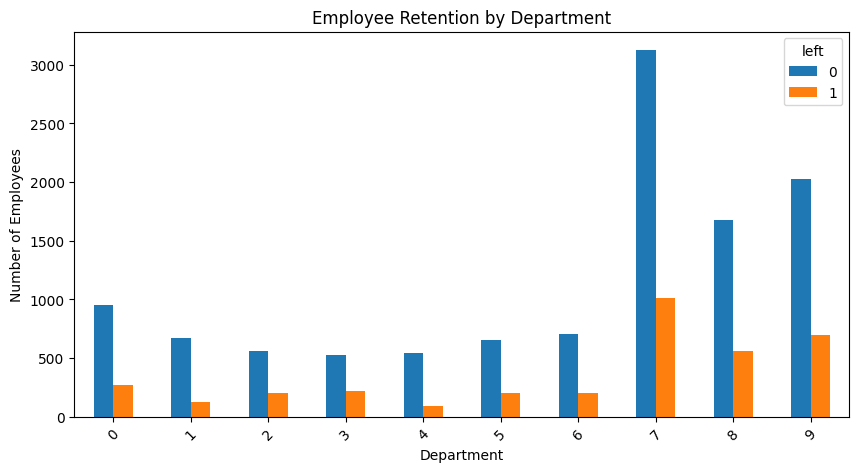

In [ ]:
pd.crosstab(df.Department, df.left).plot(kind='bar', figsize=(10,5))

plt.title("Employee Retention by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#building logistic regression model using variables
X = df[['satisfaction_level', 'salary', 'promotion_last_5years', 'Work_accident']]  # Features
y = df['left']  # Target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
#Measuring the accuracy of the model
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 75.97%


In [ ]:
accuracy = model.score(X_test, y_test)
"Model Accuracy:", accuracy


('Model Accuracy:', 0.7596666666666667)